In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 비트 평면 분할 방법을 이용한 워터마크 레이어드

```python
# 비트 평면 분할 (8개의 비트 평면 생성)
bit_planes = [(original_image >> i) & 1 for i in range(8)]
```

```python
# 가장 낮은 비트 평면에 적응형 이진화를 적용한 워터마크 삽입
bit_planes[0] = watermark_binary
```

# 1. 워터마크 삽입

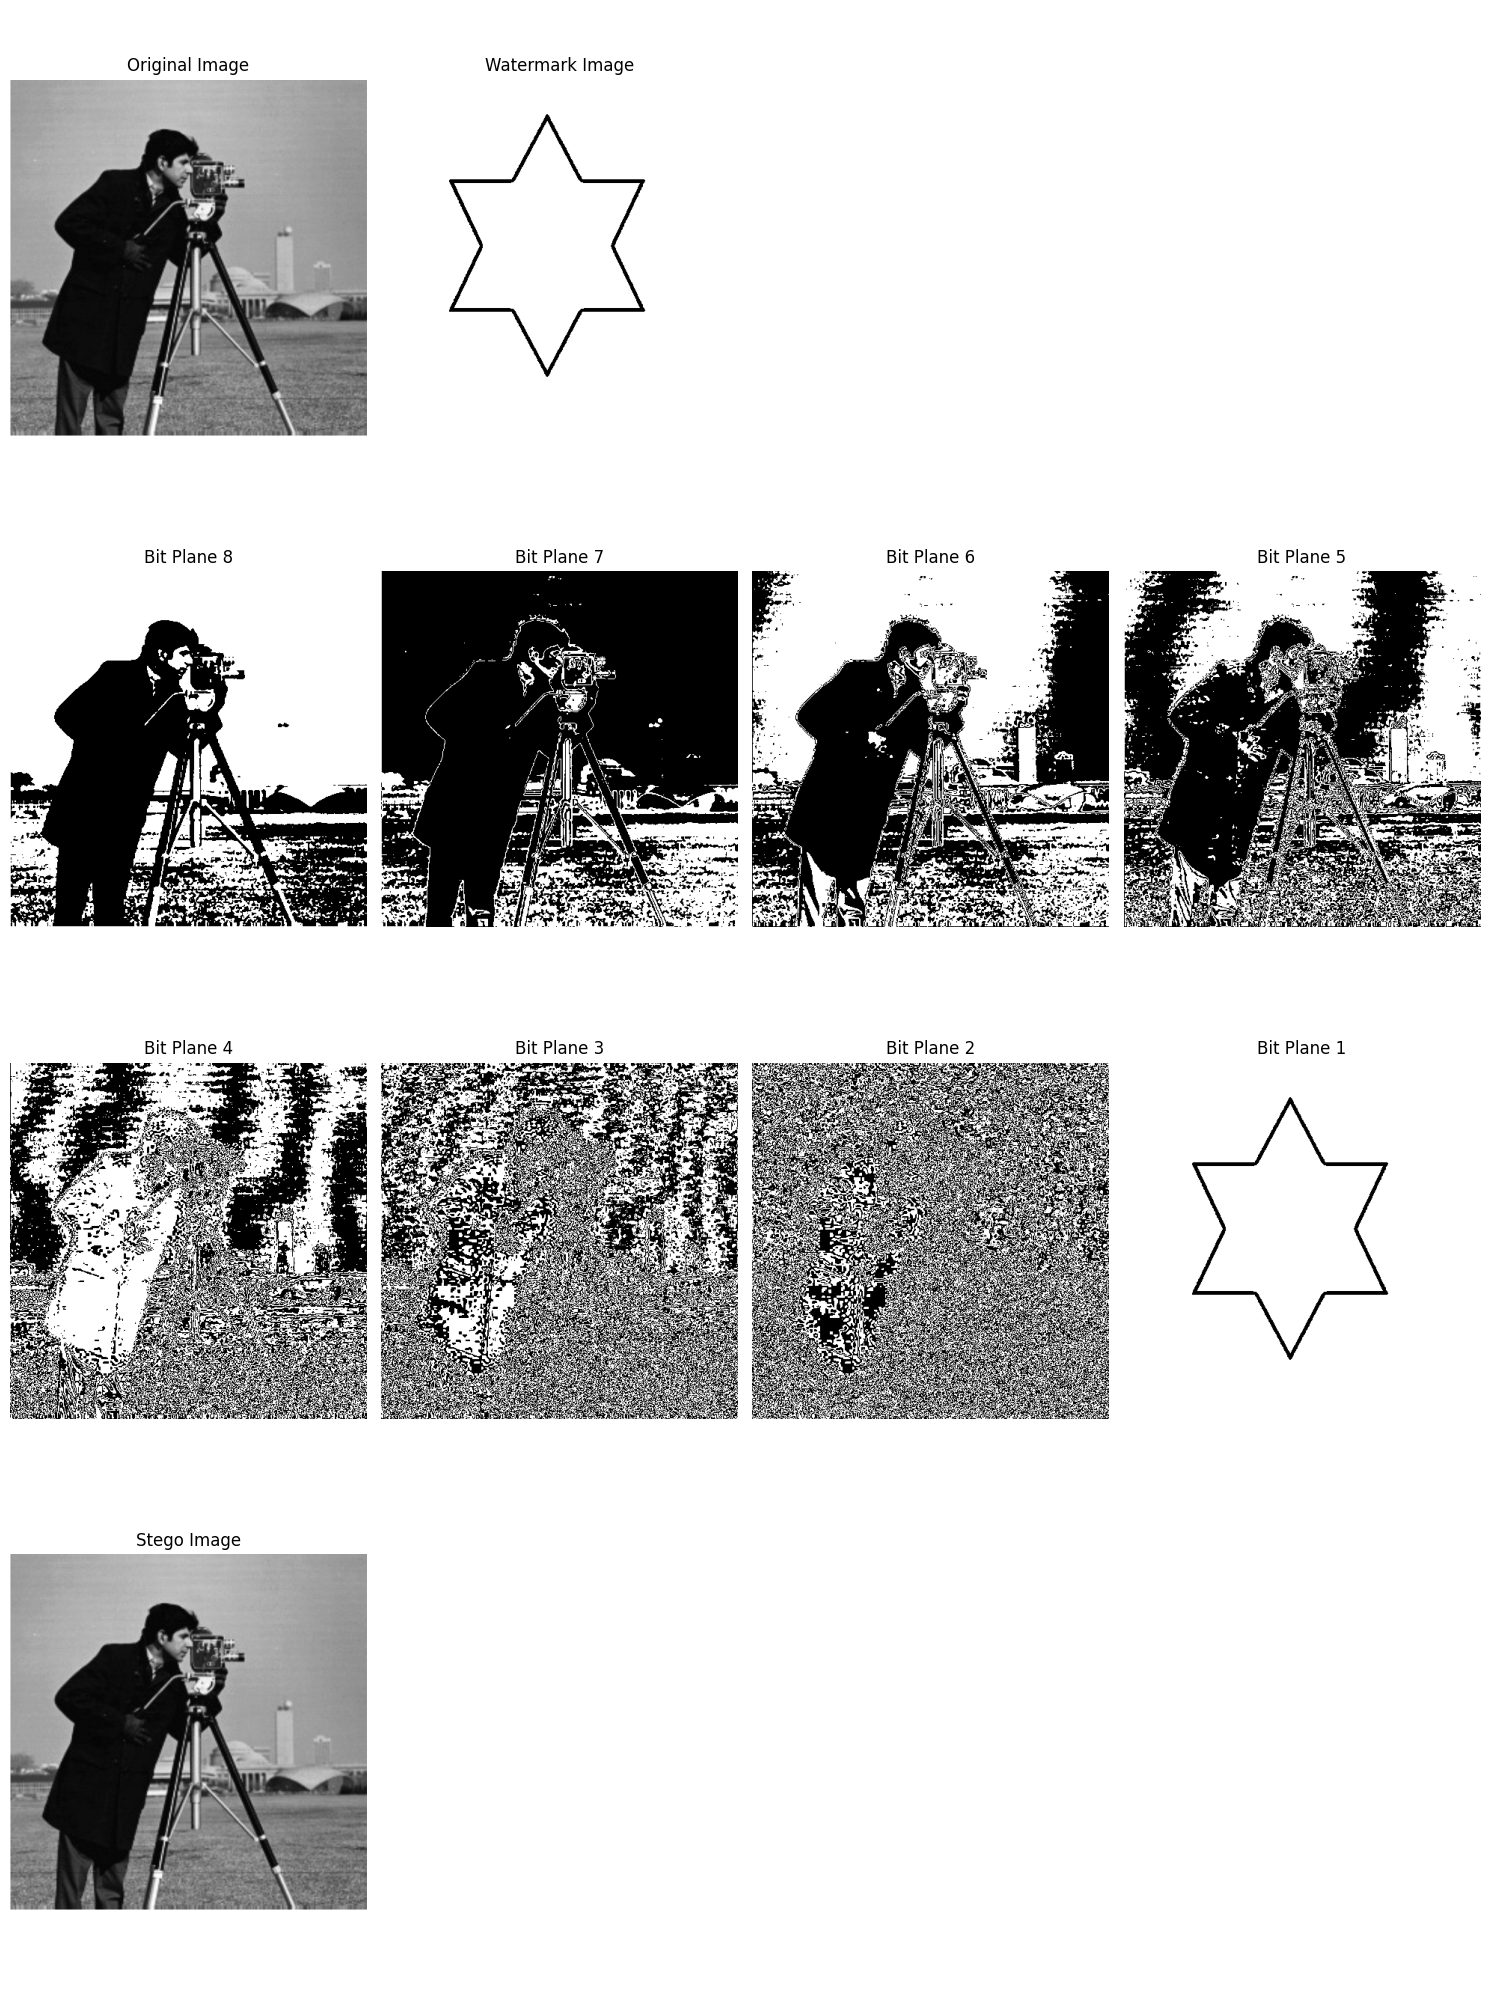

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기 (그레이스케일)
original_image = cv2.imread('/content/drive/MyDrive/Image/Camera.png', cv2.IMREAD_GRAYSCALE)
watermark_image = cv2.imread('/content/drive/MyDrive/Image/6_corner_star.PNG', cv2.IMREAD_GRAYSCALE)

# 이미지 크기 맞추기 (워터마크 이미지 크기를 원본 이미지와 동일하게)
watermark_image = cv2.resize(watermark_image, (original_image.shape[1], original_image.shape[0]))

# 적응형 이진화 적용
# cv2.ADAPTIVE_THRESH_GAUSSIAN_C는 가우시안 가중치를 적용하여 임계값을 결정합니다.
# 11은 블록 크기, 2는 평균 값에서 뺄 값입니다.
watermark_binary = cv2.adaptiveThreshold(watermark_image, 1, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# 비트 평면 분할 (8개의 비트 평면 생성)
bit_planes = [(original_image >> i) & 1 for i in range(8)]

# 가장 낮은 비트 평면에 적응형 이진화를 적용한 워터마크 삽입
bit_planes[0] = watermark_binary

# 비트 평면을 다시 합쳐서 스테고 이미지 생성
stego_image = sum([bit_planes[i] << i for i in range(8)])

# 결과 이미지 저장 및 출력
fig, axs = plt.subplots(4, 4, figsize=(15, 20))
axs[0][0].imshow(original_image, cmap='gray')
axs[0][0].set_title('Original Image')
axs[0][0].axis('off')

axs[0][1].imshow(watermark_binary, cmap='gray')
axs[0][1].set_title('Watermark Image')
axs[0][1].axis('off')

axs[0][2].axis('off')
axs[0][3].axis('off')

# 나머지 서브플롯 비트 평면 표시
for i in range(7, -1, -1):
    row = 1 + (7 - i) // 4  # 1, 2번째 행에 비트 평면을 표시
    col = (7 - i) % 4       # 0~3번째 열에 비트 평면을 표시
    axs[row][col].imshow(bit_planes[i], cmap='gray')
    axs[row][col].set_title(f'Bit Plane {i + 1}')
    axs[row][col].axis('off')

axs[3][0].imshow(stego_image, cmap='gray')
axs[3][0].set_title('Stego Image')
axs[3][0].axis('off')

for j in range(1, 4):
    axs[3][j].axis('off')

plt.tight_layout()
plt.show()


# 2. 워터마크 추출

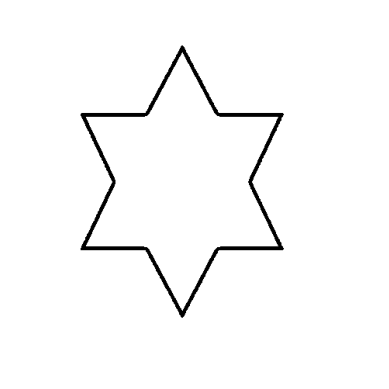

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 비트 평면 분할 (워터마크 추출)
bit_planes = [(stego_image >> i) & 1 for i in range(8)]

# 0번째 비트 평면이 워터마크 이미지
extracted_watermark = bit_planes[0] * 255  # 이진 이미지로 변환 (0과 255로 구성된 이미지)

# 결과 이미지 저장 및 출력
plt.imshow(extracted_watermark, cmap='gray')
plt.axis('off')
plt.show()

